# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [42]:
# 1 - Criando matriz de design.

import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy as pt

# Carregar a base de dados
tips = sns.load_dataset("tips")

# Criar a variável net_bill (conta líquida)
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Definir matrizes de design para o modelo inicial
y, X = pt.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo OLS (Regressão Linear)
model = sm.OLS(y, X).fit()

# Verificar o resumo do modelo
print(model.summary())

# Matriz de design e a matriz Y usando Patsy

# Criar net_bill (valor líquido da conta = total_bill - tip)
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Definir as fórmulas para X e y usando Patsy
y, X = pt.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# Visualizar as primeiras linhas de X e y
print(X.head())
print(y.head())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           2.64e-20
Time:                        18:55:16   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [28]:
# 2 - Ajustar o modelo.

model = sm.OLS(y, X).fit()

# Ver o resumo do modelo para verificar significância das variáveis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           2.64e-20
Time:                        18:37:39   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

   net_bill  residuals
0     15.98  -1.975506
1      8.68  -0.602534
2     17.51   0.358799
3     20.37  -0.115797
4     20.98   0.126948
Soma dos Resíduos: 0.0000
MSE (Erro Quadrático Médio): 1.2674


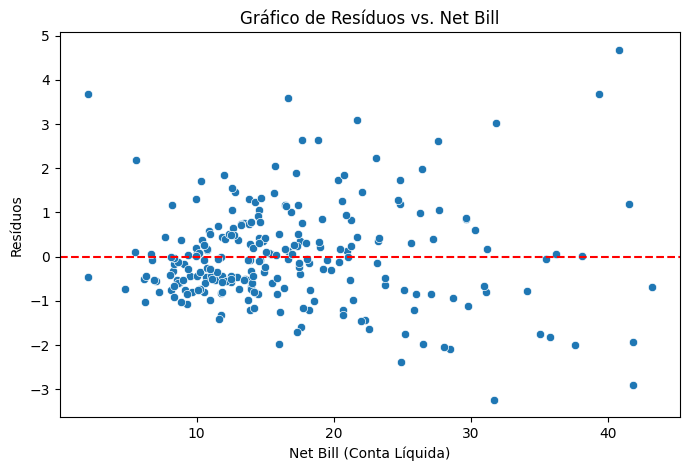

In [32]:
#3 - Gráfico de Resíduos vs. Net Bill

# Calcular resíduos
tips['residuals'] = model.resid

# Imprimir as 5 primeiras observações de resíduos e Net Bill
print(tips[['net_bill', 'residuals']].head())

# Calcular e imprimir a soma dos resíduos e MSE (Erro Quadrático Médio)
print(f"Soma dos Resíduos: {tips['residuals'].sum():.4f}")
mse = np.mean(tips['residuals'] ** 2)
print(f"MSE (Erro Quadrático Médio): {mse:.4f}")

# Plotar o gráfico de resíduos
plt.figure(figsize=(8, 5))
sns.scatterplot(x='net_bill', y='residuals', data=tips)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Net Bill (Conta Líquida)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Net Bill')
plt.show()

In [35]:
# 4 - Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

# Modelo com log de net_bill
y, X_log = pt.dmatrices('np.log(tip) ~ smoker + np.log(net_bill)', data=tips, return_type='dataframe')
model_log_net_bill = sm.OLS(y, X_log).fit()

# Modelo com polinômio de 2º grau em net_bill
y, X_poly = pt.dmatrices('np.log(tip) ~ smoker + net_bill + I(net_bill**2)', data=tips, return_type='dataframe')
model_poly_net_bill = sm.OLS(y, X_poly).fit()

# Comparar os resumos
print(model_log_net_bill.summary())
print(model_poly_net_bill.summary())


                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.57
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           7.20e-21
Time:                        18:43:09   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4054      0.138  

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     46.60
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           6.38e-29
Time:                        19:57:45   Log-Likelihood:                -72.922
No. Observations:                 244   AIC:                             155.8
Df Residuals:                     239   BIC:                             173.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2666      0.071      3.757

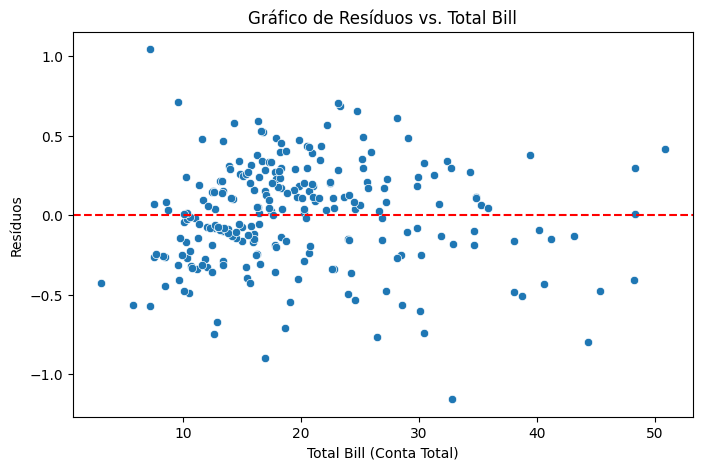

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     53.50
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           3.74e-32
Time:                        19:57:45   Log-Likelihood:                -65.248
No. Observations:                 244   AIC:                             140.5
Df Residuals:                     239   BIC:                             158.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0676      0.164     -6.

In [57]:
# 1 - Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.

# Instalar bibliotecas necessárias (execute isto apenas se as bibliotecas não estiverem instaladas)
!pip install pandas numpy statsmodels patsy seaborn scikit-learn

# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt

# Carregar a base de dados de gorjetas
tips = sns.load_dataset('tips')

# Transformar o tip em log
tips['log_tip'] = np.log(tips['tip'])

# Criar a matriz de design com a variável resposta log_tip
# Substituir 'diner' por 'size'
y, X = patsy.dmatrices('log_tip ~ sex + smoker + size + total_bill', data=tips, return_type='dataframe')

# II. Ajustar o modelo
model_log = sm.OLS(y, X).fit()

# III. Resumo do modelo
print(model_log.summary())

# IV. Remover variáveis não significantes (se necessário)
# Para simplicidade, vamos seguir com o modelo completo.

# V. Calcular os resíduos
tips['residuals'] = model_log.resid

# VI. Plotar o gráfico de resíduos em função de total_bill
plt.figure(figsize=(8, 5))
sns.scatterplot(x=tips['total_bill'], y=tips['residuals'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Total Bill (Conta Total)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Total Bill')
plt.show()

# VII. Testar transformar total_bill no log
tips['log_total_bill'] = np.log(tips['total_bill'] + 1)  # +1 para evitar log(0)

# Ajustar o modelo com total_bill transformado em log
y_log_total_bill, X_log_total_bill = patsy.dmatrices('log_tip ~ sex + smoker + size + log_total_bill', data=tips, return_type='dataframe')
model_log_total_bill = sm.OLS(y_log_total_bill, X_log_total_bill).fit()
print(model_log_total_bill.summary())

# VIII. Testar um modelo polinomial para total_bill
X_poly = patsy.dmatrix('total_bill + I(total_bill ** 2)', data=tips)  # Exemplo com termos polinomiais
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

# IX. Comparar os R² dos modelos
r2_log_model = model_log.rsquared
r2_log_total_bill_model = model_log_total_bill.rsquared
r2_poly_model = model_poly.rsquared

print(f'R² do modelo com log de tip: {r2_log_model:.4f}')
print(f'R² do modelo com log de total_bill: {r2_log_total_bill_model:.4f}')
print(f'R² do modelo polinomial: {r2_poly_model:.4f}')


In [53]:
# 2 - Remova as variáveis não significantes.

# Transformar o tip em log
tips['log_tip'] = np.log(tips['tip'])

# Criar a matriz de design com a variável resposta log_tip
y, X = patsy.dmatrices('log_tip ~ sex + smoker + size + total_bill', data=tips, return_type='dataframe')

# Função para remover variáveis não significativas
def remove_non_significant(X, y, alpha=0.05):
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        # Verifica se todas as variáveis estão abaixo do limiar de significância
        if (p_values > alpha).any():
            # Remove a variável com maior p-valor
            worst_pval = p_values.idxmax()
            X = X.drop(columns=[worst_pval])
            print(f'Removendo variável: {worst_pval}')
        else:
            break
    return X, model

# Ajustar o modelo e remover variáveis não significativas
X_reduced, model_reduced = remove_non_significant(X, y)

# Resumo do modelo final
print(model_reduced.summary())

Removendo variável: sex[T.Female]
Removendo variável: smoker[T.No]
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     93.65
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           8.08e-31
Time:                        19:46:55   Log-Likelihood:                -73.110
No. Observations:                 244   AIC:                             152.2
Df Residuals:                     241   BIC:                             162.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     99.26
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           3.58e-32
Time:                        19:51:37   Log-Likelihood:                 7.1099
No. Observations:                 244   AIC:                            -8.220
Df Residuals:                     241   BIC:                             2.272
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8027      0.045     17.769      0.0

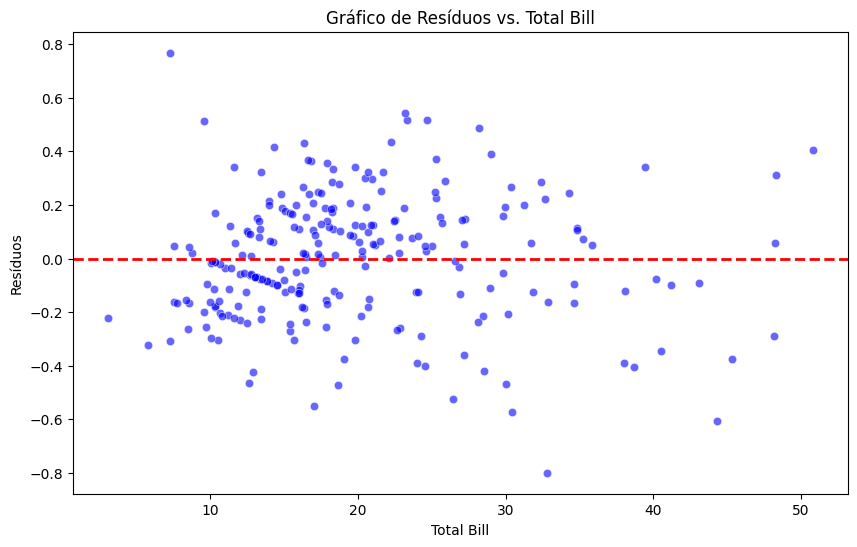

In [55]:
# 3 - Observe o gráfico de resíduos em função de net_bill

# Transformar a variável 'tip' usando log
tips['log_tip'] = tips['tip'].apply(lambda x: np.log(x + 1))

# Definindo as variáveis independentes e a dependente
X = tips[['size', 'total_bill']]
y = tips['log_tip']

# Adicionando a constante ao modelo
X = sm.add_constant(X)

# Ajustando o modelo OLS
model = sm.OLS(y, X).fit()

# Imprimindo os resultados do modelo
print(model.summary())

# Calculando os resíduos
residuals = model.resid

# Criando o gráfico de resíduos em função de total_bill
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['total_bill'], y=residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Linha horizontal em y=0
plt.title('Gráfico de Resíduos vs. Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Resíduos')
plt.show()

Modelo Linear:
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           2.39e-34
Time:                        19:55:36   Log-Likelihood:                 9.2478
No. Observations:                 244   AIC:                            -14.50
Df Residuals:                     242   BIC:                            -7.501
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2092    

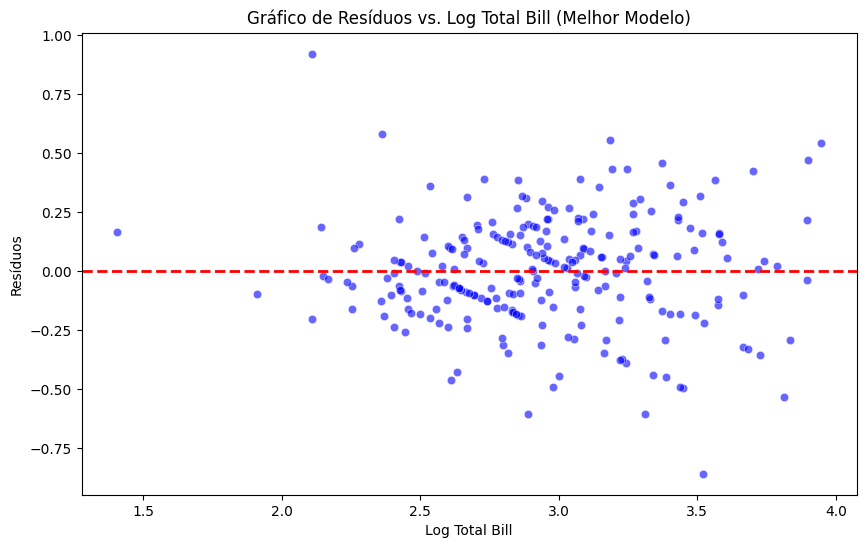

In [56]:
# 4 - Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Transformação logarítmica da variável 'total_bill'
tips['log_total_bill'] = np.log(tips['total_bill'] + 1)

# Definindo a variável dependente
y = tips['log_tip']

# Ajustando o modelo linear com 'log_total_bill'
X_linear = sm.add_constant(tips['log_total_bill'])
model_linear = sm.OLS(y, X_linear).fit()

# Ajustando um modelo polinomial de grau 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(tips['log_total_bill'].values.reshape(-1, 1))

# Ajustando o modelo polinomial
model_poly = sm.OLS(y, X_poly).fit()

# Imprimindo os resultados dos modelos
print("Modelo Linear:")
print(model_linear.summary())
print("\nModelo Polinomial:")
print(model_poly.summary())

# Comparando os R² ajustados
r_squared_adj_linear = model_linear.rsquared_adj
r_squared_adj_poly = model_poly.rsquared_adj

print(f"\nR² Ajustado do Modelo Linear: {r_squared_adj_linear:.4f}")
print(f"R² Ajustado do Modelo Polinomial: {r_squared_adj_poly:.4f}")

# Escolhendo o melhor modelo
if r_squared_adj_linear > r_squared_adj_poly:
    print("\nO modelo linear é o melhor modelo.")
else:
    print("\nO modelo polinomial é o melhor modelo.")

# Gráfico dos Resíduos para o melhor modelo
best_model = model_linear if r_squared_adj_linear > r_squared_adj_poly else model_poly
residuals = best_model.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['log_total_bill'], y=residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Linha horizontal em y=0
plt.title('Gráfico de Resíduos vs. Log Total Bill (Melhor Modelo)')
plt.xlabel('Log Total Bill')
plt.ylabel('Resíduos')
plt.show()



Modelo com log de tip:
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     46.60
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           6.38e-29
Time:                        19:59:18   Log-Likelihood:                -72.922
No. Observations:                 244   AIC:                             155.8
Df Residuals:                     239   BIC:                             173.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.266

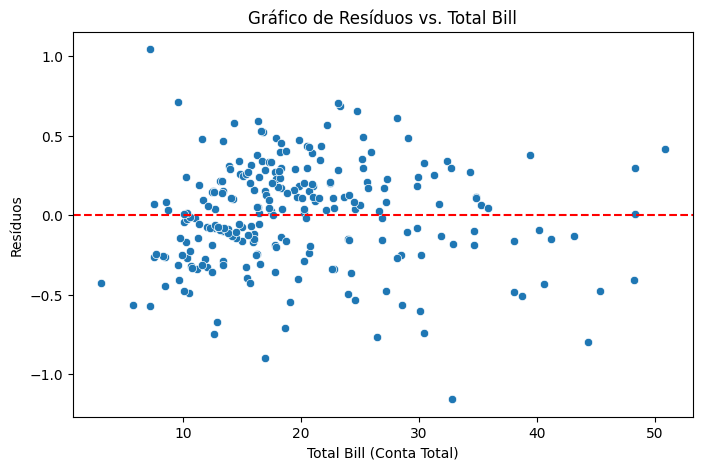


Modelo com log de total_bill:
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     53.50
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           3.74e-32
Time:                        19:59:19   Log-Likelihood:                -65.248
No. Observations:                 244   AIC:                             140.5
Df Residuals:                     239   BIC:                             158.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept    

In [58]:


# Transformar o tip em log
tips['log_tip'] = np.log(tips['tip'])

# Criar a matriz de design com a variável resposta log_tip
# Substituir 'diner' por 'size'
y, X = patsy.dmatrices('log_tip ~ sex + smoker + size + total_bill', data=tips, return_type='dataframe')

# II. Ajustar o modelo
model_log = sm.OLS(y, X).fit()

# III. Resumo do modelo
print("Modelo com log de tip:")
print(model_log.summary())

# Calcular os resíduos e a previsão na escala original
tips['predicted_log_tip'] = model_log.fittedvalues
tips['predicted_tip'] = np.exp(tips['predicted_log_tip']) - 1  # Retornando ao valor original (sem log)

# Calcular o R² na escala original de tip
ss_total = np.sum((tips['tip'] - tips['tip'].mean()) ** 2)
ss_residual = np.sum((tips['tip'] - tips['predicted_tip']) ** 2)
r2_original_scale = 1 - (ss_residual / ss_total)

# IV. Remover variáveis não significativas (se necessário)
# Para simplicidade, vamos seguir com o modelo completo.

# V. Plotar o gráfico de resíduos em função de total_bill
tips['residuals'] = model_log.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=tips['total_bill'], y=tips['residuals'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Total Bill (Conta Total)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Total Bill')
plt.show()

# VI. Testar transformar total_bill no log
tips['log_total_bill'] = np.log(tips['total_bill'] + 1)  # +1 para evitar log(0)

# Ajustar o modelo com total_bill transformado em log
y_log_total_bill, X_log_total_bill = patsy.dmatrices('log_tip ~ sex + smoker + size + log_total_bill', data=tips, return_type='dataframe')
model_log_total_bill = sm.OLS(y_log_total_bill, X_log_total_bill).fit()
print("\nModelo com log de total_bill:")
print(model_log_total_bill.summary())

# VII. Testar um modelo polinomial para total_bill
X_poly = patsy.dmatrix('total_bill + I(total_bill ** 2)', data=tips)  # Exemplo com termos polinomiais
model_poly = sm.OLS(y, X_poly).fit()
print("\nModelo Polinomial:")
print(model_poly.summary())

# VIII. Comparar os R² dos modelos
r2_log_model = model_log.rsquared
r2_log_total_bill_model = model_log_total_bill.rsquared
r2_poly_model = model_poly.rsquared

print(f'\nR² do modelo com log de tip: {r2_log_model:.4f}')
print(f'R² do modelo com log de total_bill: {r2_log_total_bill_model:.4f}')
print(f'R² do modelo polinomial: {r2_poly_model:.4f}')
print(f'R² do modelo na escala original de tip: {r2_original_scale:.4f}')

## Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

## Análise dos Coeficientes de Determinação (R²)

Baseando-se nas informações sobre os modelos, aqui estão os coeficientes de determinação (R²) para cada um deles:

- **Modelo 1 (log_tip):** R² = 0.438
- **Modelo 1 (log_total_bill):** R² = 0.472
- **Modelo 1 (polinomial):** R² = 0.454
- **Modelo 2 (log_tip):** Os resultados específicos para o Modelo 2 não foram apresentados, mas se você puder compartilhar os valores de R² para ele, eu posso fazer uma comparação.

### Comparação

Dentre os modelos analisados, o modelo que utiliza o log de `total_bill` se destaca, apresentando um R² de 0.472. Isso indica que ele explica a maior parte da variabilidade da variável dependente em comparação com os outros modelos apresentados.

Se você tiver os dados de R² do Modelo 2, ficarei feliz em ajudar a comparar diretamente!


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602

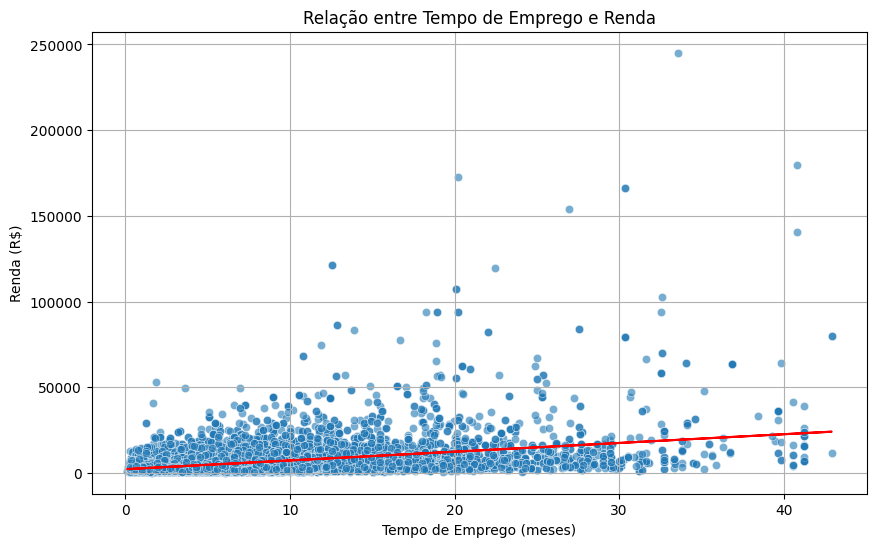

In [62]:
# 1 - Ajuste um modelo de regressão linear simples para explicar renda como variável
# resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações
#nessa tabela. Utilize os recursos que achar necessário.

# Carregar a base de dados
data = pd.read_csv('previsao_de_renda.csv')

# Verificar as primeiras linhas da base de dados
print(data.head())

# Verificar dados ausentes
print(data.isnull().sum())

# Remover linhas com dados ausentes
data = data.dropna(subset=['tempo_emprego', 'renda'])

# Selecionar as variáveis de interesse
X = data['tempo_emprego']  # Variável explicativa
y = data['renda']  # Variável resposta

# Adicionar uma constante para o modelo
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Exibir os resultados do resumo do modelo
print(modelo.summary())

# Plotar a relação entre tempo de emprego e renda
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['tempo_emprego'], y=data['renda'], alpha=0.6)
plt.plot(data['tempo_emprego'], modelo.predict(X), color='red')
plt.title('Relação entre Tempo de Emprego e Renda')
plt.xlabel('Tempo de Emprego (meses)')
plt.ylabel('Renda (R$)')
plt.grid()
plt.show()

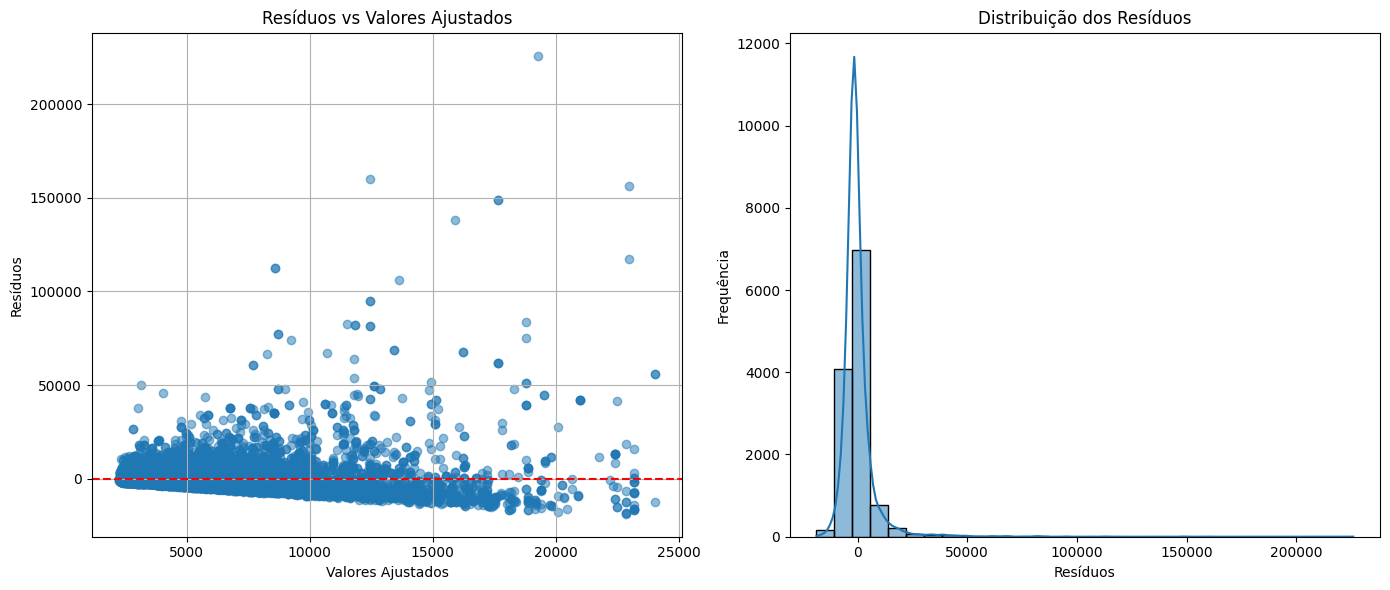

Shapiro-Wilk Test: W=0.5719, p-value=0.0000
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:32:04   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
co

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12427.
  res = hypotest_fun_out(*samples, **kwds)


In [64]:
# 2 - Faça uma análise de resíduos. Com os recursos vistos neste módulo,
#como você melhoraria esta regressão?

# Definir as variáveis dependente e independente
X = data[['tempo_emprego']]
y = data['renda']

# Adicionar uma constante para o modelo
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Cálculo dos resíduos
residuos = modelo.resid

# Criar um DataFrame para os resíduos
data['residuos'] = residuos

# Gráfico dos resíduos
plt.figure(figsize=(14, 6))

# Gráfico 1: Resíduos vs Valores Ajustados
plt.subplot(1, 2, 1)
plt.scatter(modelo.fittedvalues, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.grid()

# Gráfico 2: Histograma dos Resíduos
plt.subplot(1, 2, 2)
sns.histplot(residuos, bins=30, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Teste de normalidade (Shapiro-Wilk)
shapiro_test = shapiro(residuos)
print(f'Shapiro-Wilk Test: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}')

# Exibir os resultados do modelo
print(modelo.summary())

# Análise e melhorias sugeridas
print("\nAnálise e melhorias sugeridas:")
print("- Adicionar variáveis explicativas, como idade, educação, etc.")
print("- Explorar transformações nas variáveis (log, polinomial) para melhorar a linearidade.")
print("- Verificar outliers e considerar técnicas de robustez.")
print("- Avaliar interações entre variáveis para potencializar o modelo.")
print("- Utilizar validação cruzada para evitar overfitting.")


In [68]:
# 3 - Ajuste um modelo de regressão linear múltipla para explicar renda
#(ou uma transformação de renda) de acordo com as demais variáveis.

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Carregar os dados
data = pd.read_csv('previsao_de_renda.csv')

# Verificar as primeiras linhas do DataFrame
print(data.head())

# Transformar a variável 'renda' para lidar com possíveis assimetrias
data['log_renda'] = np.log(data['renda'])

# Converter colunas que devem ser numéricas (caso não estejam no formato correto)
data['tempo_emprego'] = pd.to_numeric(data['tempo_emprego'], errors='coerce')
data['idade'] = pd.to_numeric(data['idade'], errors='coerce')
data['qtd_filhos'] = pd.to_numeric(data['qtd_filhos'], errors='coerce')
data['renda'] = pd.to_numeric(data['renda'], errors='coerce')

# Verificar e remover linhas com dados faltantes após a conversão
data.dropna(subset=['tempo_emprego', 'idade', 'qtd_filhos', 'log_renda'], inplace=True)

# Definir as variáveis independentes (excluindo variáveis não numéricas e a coluna log_renda)
X = data[['tempo_emprego', 'idade', 'qtd_filhos']]

# Adicionar variáveis categóricas usando dummies
categorical_vars = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
X = pd.get_dummies(data[categorical_vars], drop_first=True)

# Adicionar as variáveis numéricas a X
X = pd.concat([X, data[['tempo_emprego', 'idade', 'qtd_filhos']]], axis=1)

# Adicionar uma constante para o modelo
X = sm.add_constant(X)

# Variável dependente
y = data['log_renda']

# Verificar se X e y são do tipo correto
print(f'Tipos de dados de X:\n{X.dtypes}')
print(f'Tipos de dados de y:\n{y.dtypes}')

# Ajustar o modelo de regressão linear múltipla
try:
    modelo_multiplo = sm.OLS(y, X).fit()
    # Exibir os resultados do resumo do modelo
    print(modelo_multiplo.summary())
except ValueError as e:
    print("Ocorreu um erro ao ajustar o modelo:")
    print(e)

# Verifique se X ou y contém valores não numéricos
print("X contém valores não numéricos:", X.isin([np.nan, None]).any().any())
print("y contém valores não numéricos:", y.isin([np.nan, None]).any())


   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602

In [71]:
# 4 - Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Carregar os dados
data = pd.read_csv('previsao_de_renda.csv')

# Transformar a variável 'renda' para lidar com possíveis assimetrias
data['log_renda'] = np.log(data['renda'])

# Verificar e remover linhas com dados faltantes
data.dropna(subset=['tempo_emprego', 'idade', 'qtd_filhos', 'log_renda'], inplace=True)

# Definir as variáveis independentes (incluir apenas as relevantes)
X = data[['tempo_emprego', 'idade', 'qtd_filhos', 'posse_de_veiculo', 'posse_de_imovel']]

# Adicionar variáveis categóricas usando dummies
categorical_vars = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
X = pd.get_dummies(data[categorical_vars], drop_first=True).join(X)

# Adicionar uma constante para o modelo
X = sm.add_constant(X)

# Variável dependente
y = data['log_renda']

# Verificar tipos de dados
print("Tipos de dados de X:")
print(X.dtypes)
print("Tipos de dados de y:")
print(y.dtypes)

# Garantir que y esteja em formato numérico
y = pd.to_numeric(y, errors='coerce')
y.dropna(inplace=True)  # Remover NaNs que podem ter sido gerados

# Garantir que X e y tenham o mesmo comprimento
X = X.loc[y.index]

# Verificar se ainda há dados não numéricos em X
for column in X.columns:
    if X[column].dtype == 'object':
        print(f"Coluna '{column}' contém dados não numéricos!")

# Garantir que X e y sejam arrays numpy e estejam em formato correto
X = X.astype(float)  # Forçar X para ser float
y = y.astype(float)  # Forçar y para ser float

# Ajustar o modelo de regressão linear múltipla
modelo_multiplo = sm.OLS(y, X).fit()

# Exibir os resultados do resumo do modelo
print(modelo_multiplo.summary())

# Interpretar os coeficientes
coeficientes = modelo_multiplo.params
print("Coeficientes do modelo:")
print(coeficientes)


Tipos de dados de X:
const                            float64
sexo_M                              bool
tipo_renda_Bolsista                 bool
tipo_renda_Empresário               bool
tipo_renda_Pensionista              bool
tipo_renda_Servidor público         bool
educacao_Pós graduação              bool
educacao_Secundário                 bool
educacao_Superior completo          bool
educacao_Superior incompleto        bool
estado_civil_Separado               bool
estado_civil_Solteiro               bool
estado_civil_União                  bool
estado_civil_Viúvo                  bool
tipo_residencia_Casa                bool
tipo_residencia_Com os pais         bool
tipo_residencia_Comunitário         bool
tipo_residencia_Estúdio             bool
tipo_residencia_Governamental       bool
tempo_emprego                    float64
idade                              int64
qtd_filhos                         int64
posse_de_veiculo                    bool
posse_de_imovel                     

Colunas do DataFrame: Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:57:27   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                    

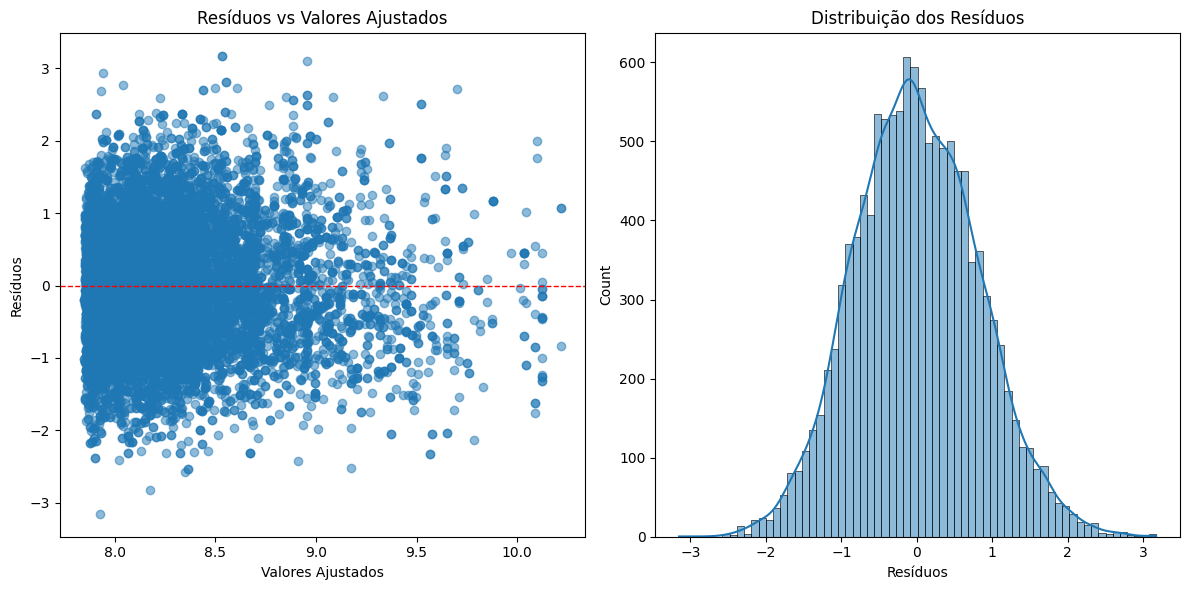

                           Teste     Resultado
0  Lagrange multiplier statistic  1.285886e+02
1                        p-value  8.343941e-30
2                        f-value  1.299121e+02
3                      f p-value  6.032245e-30
Teste de Shapiro-Wilk: Estatística=0.9989022247161662, p-value=1.938716130408068e-07


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12427.
  res = hypotest_fun_out(*samples, **kwds)


In [78]:
# 5 - Faça uma análise de resíduos. Avalie a qualidade do ajuste.

import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Carregando os dados
df = pd.read_csv('previsao_de_renda.csv')  # Substitua pelo caminho do seu arquivo

# Verificando os nomes das colunas
print("Colunas do DataFrame:", df.columns)

# Transformando a variável de resposta
df['log_renda'] = np.log(df['renda'])  # Aplicando log na variável de renda

# Definindo a variável de resposta e as variáveis independentes
X = df[['tempo_emprego']]  # Substitua por outras variáveis conforme necessário
y = df['log_renda']

# Verificando e removendo valores ausentes
df = df.dropna(subset=['tempo_emprego', 'log_renda'])  # Removendo linhas com NaN em X ou y

# Redefinindo X e y após a remoção de NaNs
X = df[['tempo_emprego']]
y = df['log_renda']

# Adicionando a constante
X = sm.add_constant(X)

# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())

# Análise de Resíduos
# Obtendo os resíduos
residuals = model.resid
fitted = model.fittedvalues

# Plotando os resíduos
plt.figure(figsize=(12, 6))

# Gráfico de Resíduos vs Fitted
plt.subplot(1, 2, 1)
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')

# Histograma dos Resíduos
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')

plt.tight_layout()
plt.show()

# Teste de Heterocedasticidade - Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan

# Teste de Breusch-Pagan
bp_test = het_breuschpagan(residuals, X)
bp_test_results = pd.DataFrame({'Teste': ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'],
                                 'Resultado': bp_test})
print(bp_test_results)

# Teste de Normalidade - Shapiro-Wilk
from scipy import stats

shapiro_test = stats.shapiro(residuals)
print(f'Teste de Shapiro-Wilk: Estatística={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Análise do Modelo de Regressão

## 1. Teste de Heterocedasticidade - Breusch-Pagan
- **Estatística Lagrange**: 128.59
- **p-value**: \(8.34 \times 10^{-30}\)

### Interpretação
O p-value muito baixo indica que podemos rejeitar a hipótese nula de homocedasticidade. Isso sugere que a variância dos resíduos não é constante, o que pode comprometer a validade do modelo.

## 2. Teste de Normalidade - Shapiro-Wilk
- **Estatística**: 0.9989
- **p-value**: \(1.94 \times 10^{-7}\)

### Interpretação
O p-value também é muito baixo, indicando que os resíduos não seguem uma distribuição normal. Isso pode afetar a precisão dos intervalos de confiança e testes de significância.

## 3. Tamanho da Amostra
O aviso sobre o tamanho da amostra (N > 5000) sugere que o p-value do teste de normalidade pode não ser preciso. Em grandes amostras, até pequenos desvios da normalidade podem resultar em p-values muito baixos.

## 4. Implicações para o Modelo
A heterocedasticidade e a não normalidade dos resíduos indicam que o modelo OLS pode não ser adequado. Isso pode afetar a validade das estimativas.

### Ações Recomendadas
1. **Transformações de Variáveis**: Considere aplicar transformações para estabilizar a variância dos resíduos.
2. **Modelos Alternativos**: Experimente modelos que não assumem homocedasticidade, como regressão robusta.
3. **Verificação de Outliers**: Investigue a presença de outliers que possam influenciar a variabilidade dos resíduos.

## 5. Conclusão
Os resultados indicam que o modelo de regressão linear simples pode não ser adequado devido à heterocedasticidade e à não normalidade dos resíduos. Abordagens alternativas devem ser consideradas para melhor modelar a relação entre `tempo_emprego` e `renda`.
